In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

In [18]:
file_path = '../data/diabetes_prediction_dataset.csv'
df = pd.read_csv(file_path)

# Setting the sample size of 2500 and taking random data
df_vis = df.sample(n=2500, random_state=42)

print(f"Dataset successfully sampled. Using {len(df_vis)} rows for visualization.")

# Remove duplicates (Cleaning)
df_vis = df_vis.drop_duplicates()

# Prepare data for Correlation Heatmap (needs numbers, not words)
df_encoded = df_vis.copy()

# Turn text categories into numbers just for the heatmap
for col in ['gender', 'smoking_history']:
    if col in df_encoded.columns:
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df_encoded[col])

Dataset successfully sampled. Using 2500 rows for visualization.


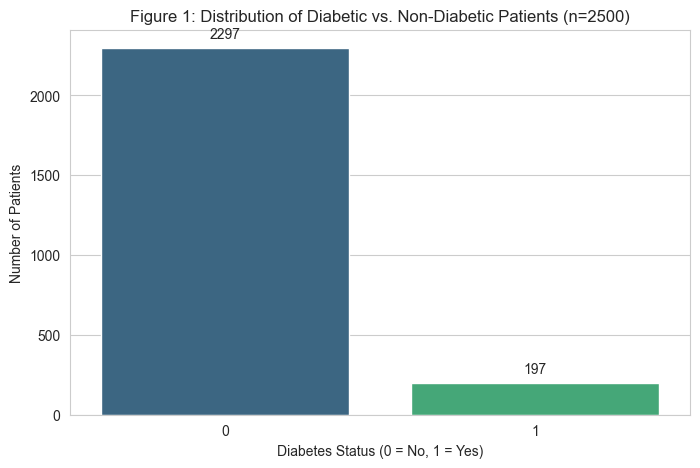

In [19]:
sns.set_style("whitegrid")

plt.figure(figsize=(8, 5))
ax = sns.countplot(x='diabetes', data=df_vis, palette='viridis', hue = 'diabetes', legend = False)
plt.title('Figure 1: Distribution of Diabetic vs. Non-Diabetic Patients (n=2500)')
plt.xlabel('Diabetes Status (0 = No, 1 = Yes)')
plt.ylabel('Number of Patients')
# Add counts on top of bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

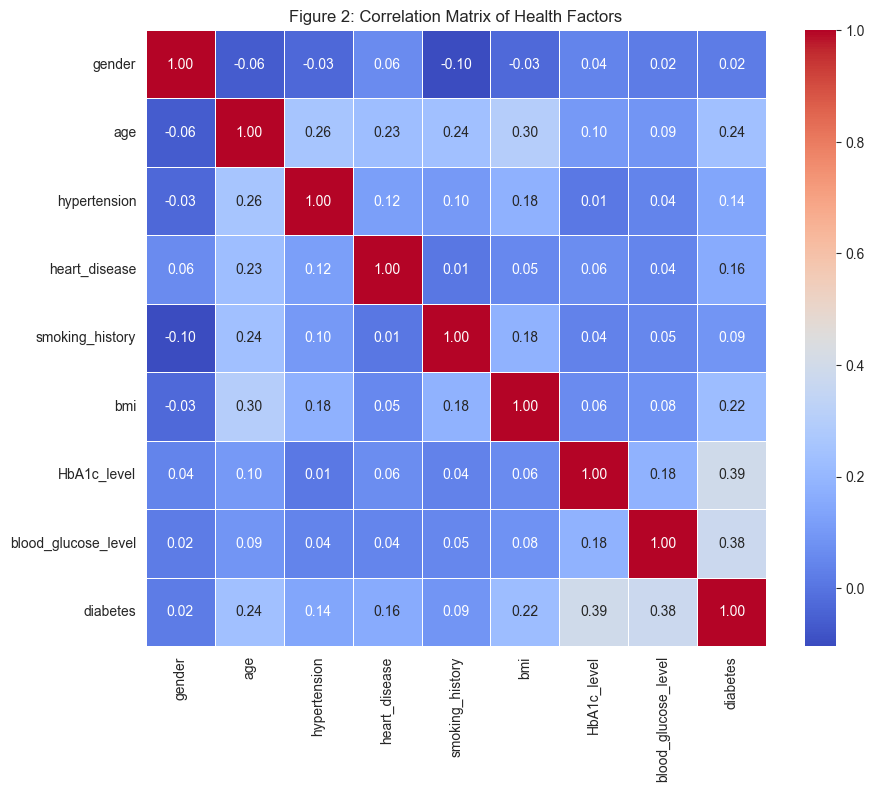

In [20]:
plt.figure(figsize=(10, 8))
correlation_matrix = df_encoded.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Figure 2: Correlation Matrix of Health Factors')
plt.show()

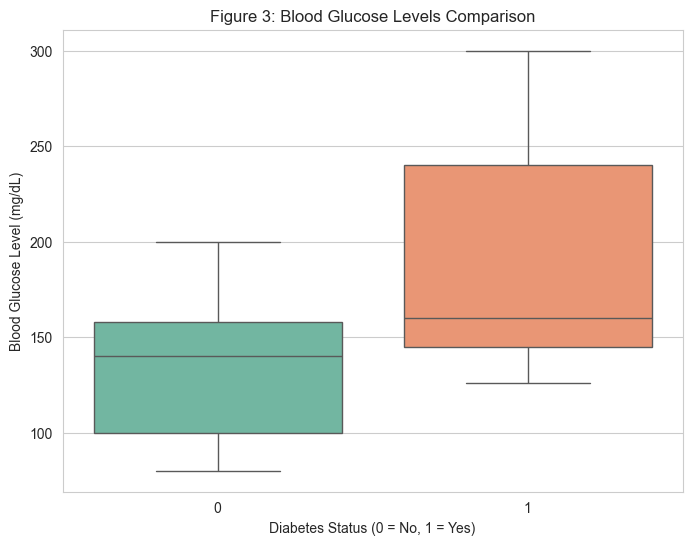

In [21]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='diabetes', y='blood_glucose_level', hue = 'diabetes', data=df_vis, palette='Set2', legend = False)
plt.title('Figure 3: Blood Glucose Levels Comparison')
plt.xlabel('Diabetes Status (0 = No, 1 = Yes)')
plt.ylabel('Blood Glucose Level (mg/dL)')
plt.show()

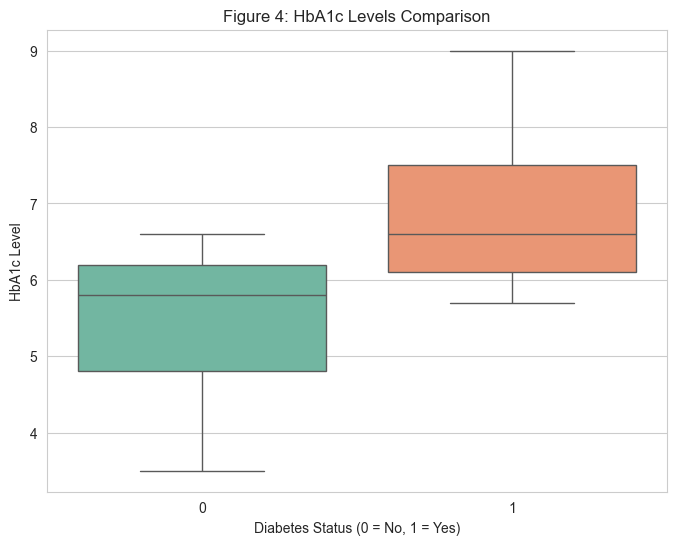

In [22]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='diabetes', y='HbA1c_level', data=df_vis, palette='Set2', hue = 'diabetes', legend = False)
plt.title('Figure 4: HbA1c Levels Comparison')
plt.xlabel('Diabetes Status (0 = No, 1 = Yes)')
plt.ylabel('HbA1c Level')
plt.show()